In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def nucleus_energy(N, Z, D):
    """ 
    Calculates binding energy of nucleus.
        N - number of neutrons
        Z - number of protons
        D - quantum pairing factor
        These may be numpy arrays.
    Returns energy in MeV
    """
    
    A = N + Z
    alpha = 15.753
    beta = 17.804
    gamma = 0.7103
    epsilon = 23.69
    
    """ alpha, beta, gamma and epsilon factors may vary in different books """
        
    return (alpha*(A) - beta*(A**(2/3)) - gamma*(Z**2)/(A**(1/3)) - epsilon*((N-Z)**2)/A) + D

#### Generate two numpy arrays N (number of neutrons) and Z (number of protons)

In [6]:
N = np.arange(1, 180)
Z = np.arange(1, 180)

#### Create two arrays Zv, Nv of shape (Z.shape and N.shape) their values are the same as Z and N

In [7]:
Zv, Nv = np.meshgrid(Z, N)

#### Quantum pairing factor has different values dependent on parity of Z and N
Code below creates array D with sum of modulos of Zv and Nv. The array will have values 0, 1 and 2. 0 when both Z and N are even, 1 when only one of them is even and 2 if both are odd. Then the code changes these numbers with proper values of quantum pairing factor.

In [8]:
#this will work if Z and N have the same shape
D = Zv%2 + Nv%2
D = np.where(D == 2, -34, D)
D = np.where(D == 0, 34, D)
D = np.where(D == 1, 0, D)

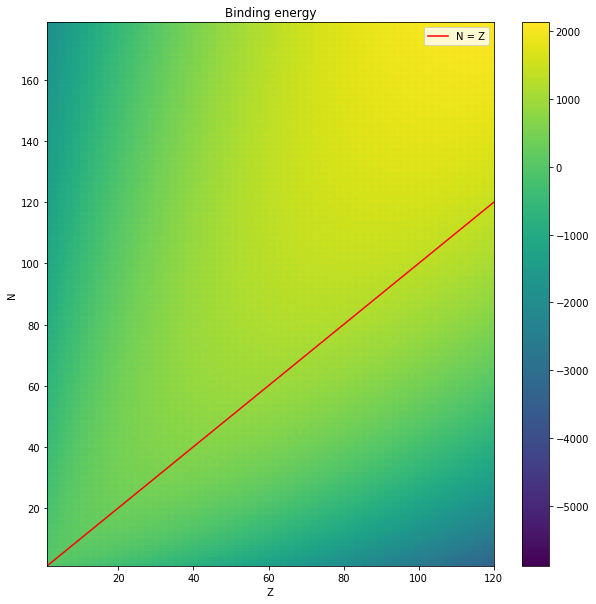

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.pcolormesh(Z, N, nucleus_energy(Nv, Zv, D))
ax.set_xlabel('Z')
ax.set_ylabel('N')
fig.colorbar(c)
ax.set_title('Binding energy')
ax.plot(N, Z, color='r', label='N = Z')
ax.set_xlim(right=120)
ax.legend()

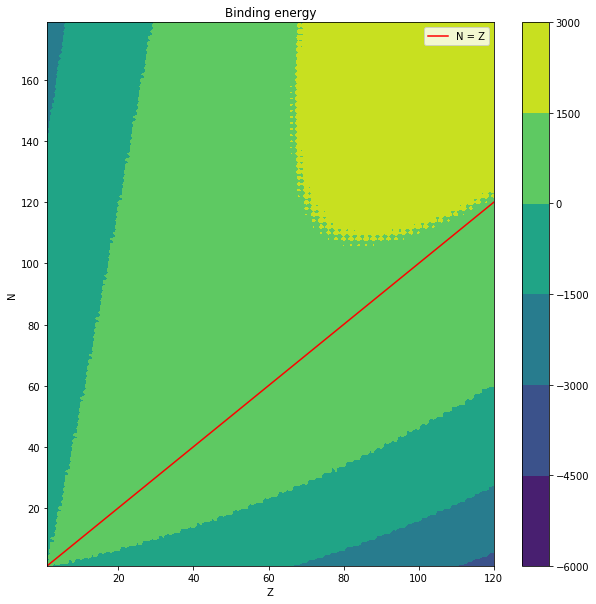

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.contourf(Z, N, nucleus_energy(Nv, Zv, D))
ax.set_xlabel('Z')
ax.set_ylabel('N')
fig.colorbar(c)
ax.set_title('Binding energy')
ax.plot(N, Z, color='r', label='N = Z')
ax.set_xlim(right=120)
ax.legend()